<a href="https://colab.research.google.com/github/springboardmentor345a-create/Projects_2/blob/shanmuka--priya/LEAGUE_WINNER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
# Corrected path to read the file directly from the Colab environment
path = "/content/drive/MyDrive/ScoreSight_ML_Season_LeagueWinner_Champion (2).csv"
league_winner = pd.read_csv(path)
league_winner.head()

,season,team,matches_played,wins,draws,losses,points_per_game,goals_scored,goals_conceded,goal_difference,target_total_points,target_league_position,target_champion,target_top_4,target_top_6,target_relegated
0,2015-16,Bournemouth,38,11,9,18,1.105263,45.0,67.0,-22.0,42,15,0,0,0,0
1,2015-16,Norwich,38,9,7,22,0.894737,39.0,67.0,-28.0,34,19,0,0,0,1
2,2015-16,Man United,38,19,9,10,1.736842,49.0,35.0,14.0,66,4,0,1,1,0
3,2015-16,Chelsea,38,12,14,12,1.315789,59.0,53.0,6.0,50,10,0,0,0,0
4,2015-16,Everton,38,11,14,13,1.236842,59.0,55.0,4.0,47,11,0,0,0,0


In [3]:
league_winner.isnull().sum()

,0
season,0
team,0
matches_played,0
wins,0
draws,0
losses,0
points_per_game,0
goals_scored,0
goals_conceded,0
goal_difference,0


In [4]:
league_winner.describe()

,matches_played,wins,draws,losses,points_per_game,goals_scored,goals_conceded,goal_difference,target_total_points,target_league_position,target_champion,target_top_4,target_top_6,target_relegated
count,180.0,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,38.0,14.544444,8.911111,14.544444,1.382749,53.833333,53.833333,0.000000,52.544444,10.372222,0.050000,0.205556,0.305556,0.150000
std,0.0,6.297399,2.874058,6.018892,0.478125,17.635509,13.931396,28.486006,18.168769,5.774177,0.218553,0.405234,0.461927,0.358067
min,38.0,2.000000,2.000000,1.000000,0.315789,20.000000,22.000000,-69.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,38.0,10.000000,7.000000,10.750000,1.052632,40.000000,44.750000,-19.250000,40.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,38.0,13.000000,9.000000,15.000000,1.315789,51.000000,54.000000,-2.500000,50.000000,10.000000,0.000000,0.000000,0.000000,0.000000
75%,38.0,19.000000,11.000000,18.000000,1.736842,65.250000,63.000000,15.250000,66.000000,15.000000,0.000000,0.000000,1.000000,0.000000
max,38.0,32.000000,15.000000,30.000000,2.631579,106.000000,104.000000,79.000000,100.000000,20.000000,1.000000,1.000000,1.000000,1.000000


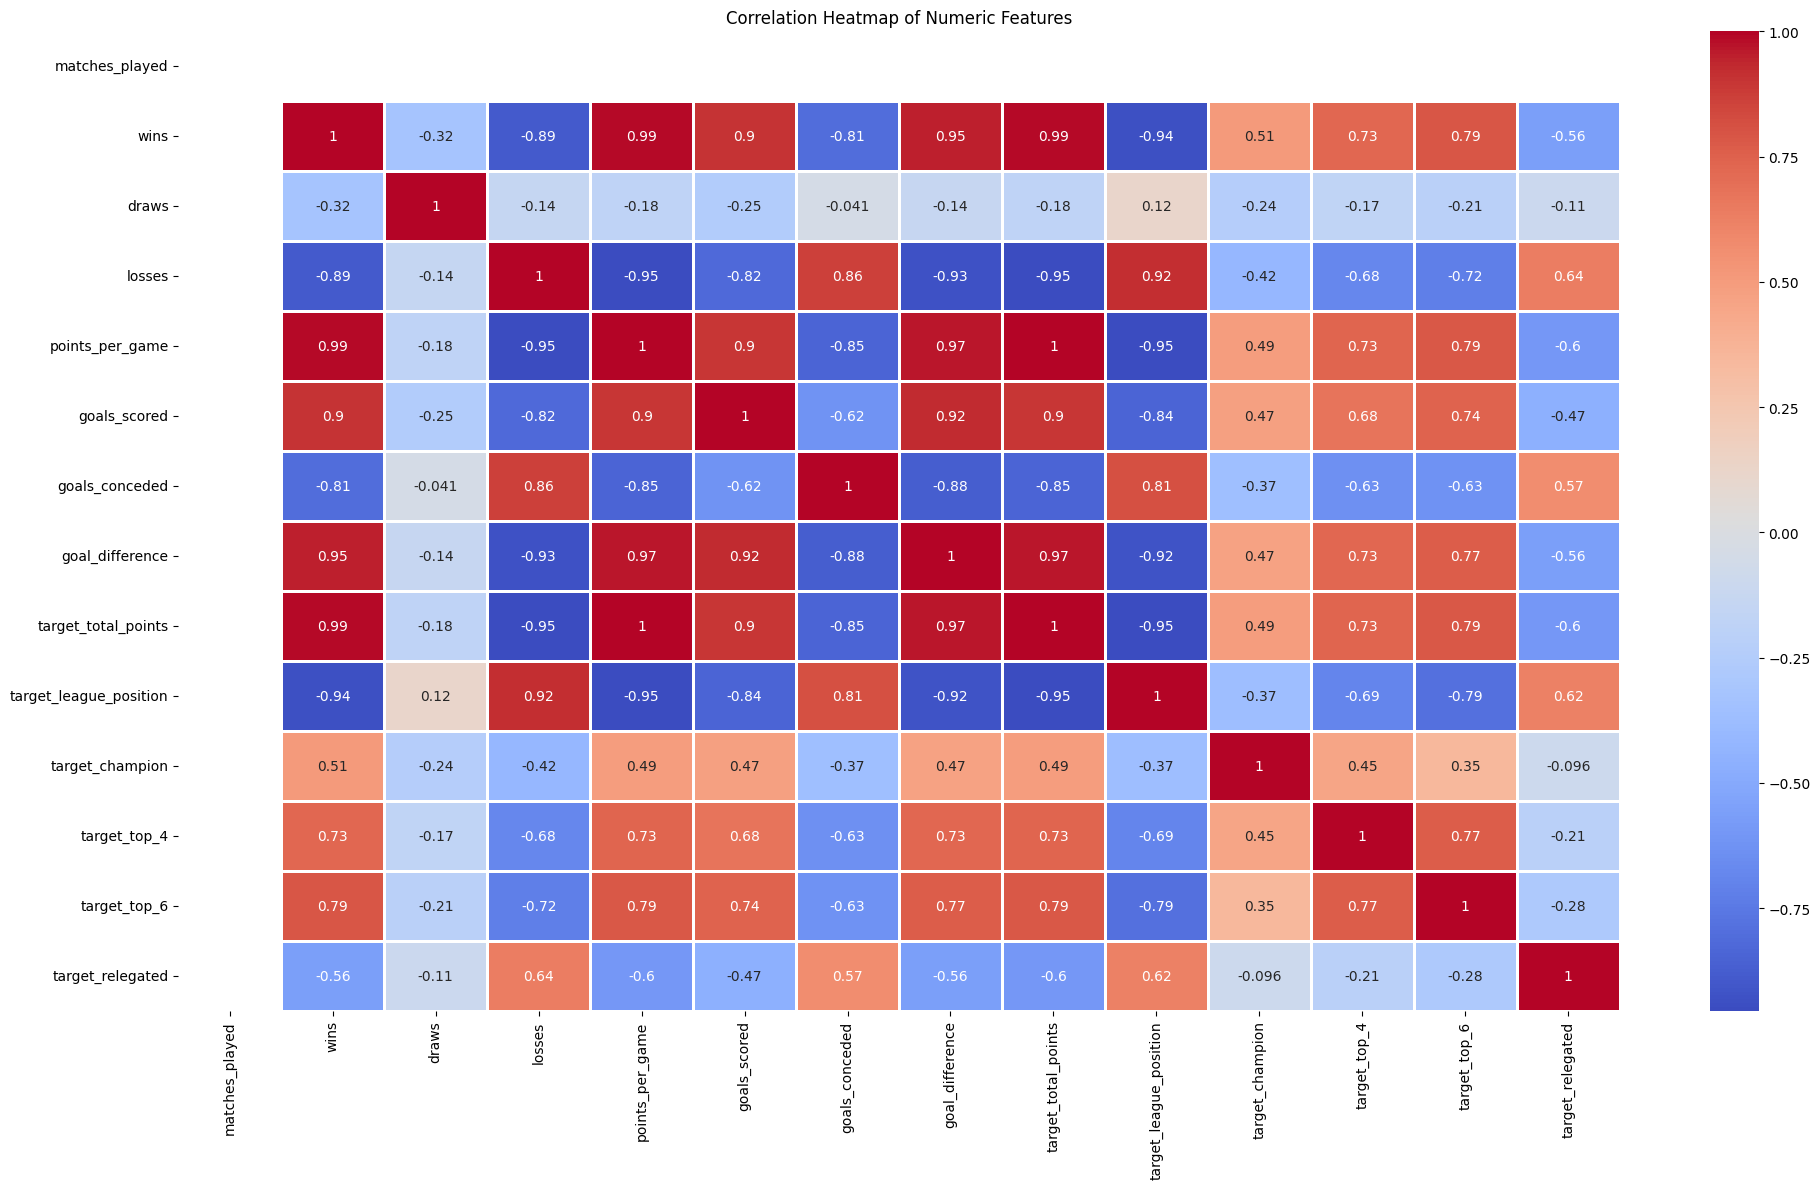

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df_match_winner = league_winner.select_dtypes(include='number')
correlation_matrix = numeric_df_match_winner.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm',linewidths=2)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

In [6]:
selected_columns = [
    'matches_played',
    'wins',
    'draws',
    'losses',
    'goals_scored',
    'goals_conceded',
    'target_total_points',
    'target_champion'
]
league_winner_selected = league_winner[selected_columns]
league_winner_selected.head()

,matches_played,wins,draws,losses,goals_scored,goals_conceded,target_total_points,target_champion
0,38,11,9,18,45.0,67.0,42,0
1,38,9,7,22,39.0,67.0,34,0
2,38,19,9,10,49.0,35.0,66,0
3,38,12,14,12,59.0,53.0,50,0
4,38,11,14,13,59.0,55.0,47,0


In [7]:
#checking for null values
league_winner_selected.isnull().sum()

,0
matches_played,0
wins,0
draws,0
losses,0
goals_scored,0
goals_conceded,0
target_total_points,0
target_champion,0


In [8]:
#checking for duplicates
league_winner_selected.duplicated().sum()

np.int64(0)

Generating box plots for columns: ['matches_played', 'wins', 'draws', 'losses', 'points_per_game', 'goals_scored', 'goals_conceded', 'goal_difference', 'target_total_points', 'target_league_position', 'target_champion', 'target_top_4', 'target_top_6', 'target_relegated']


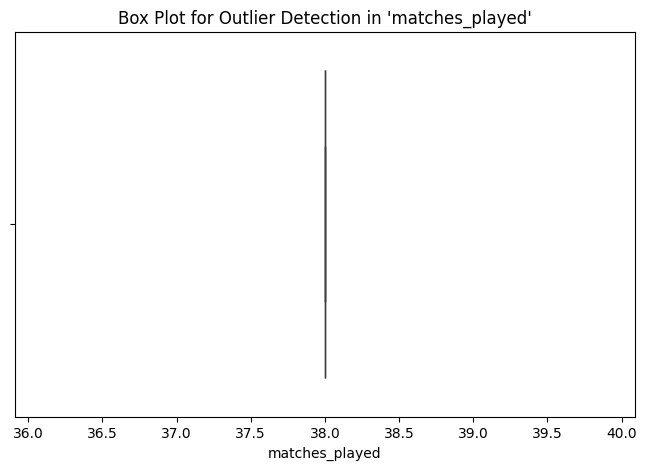

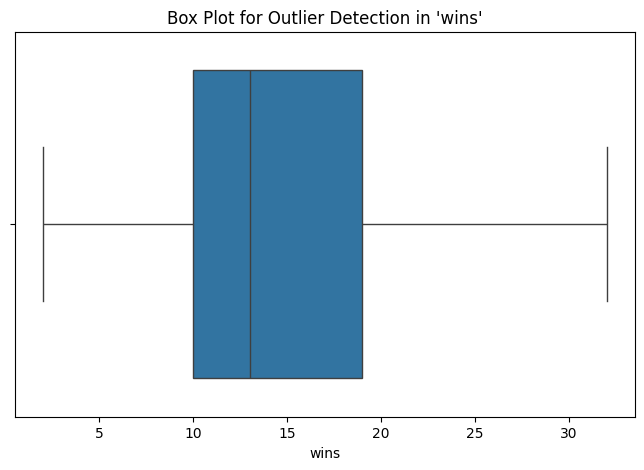

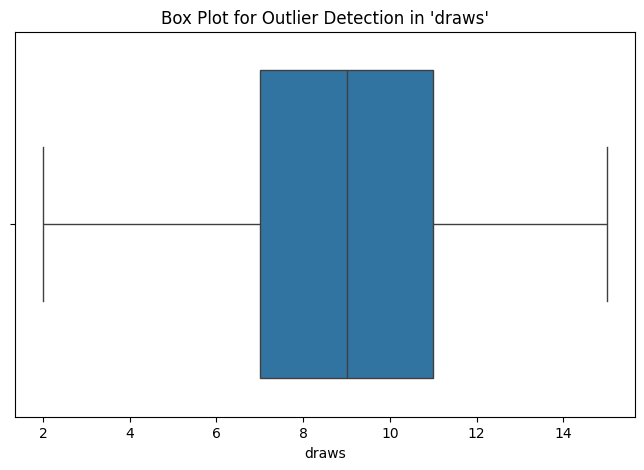

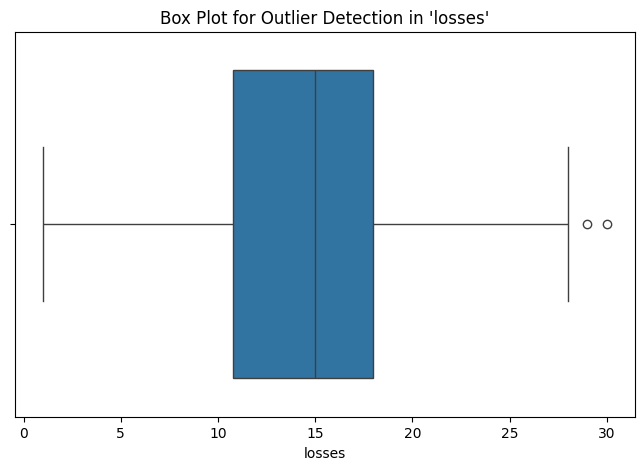

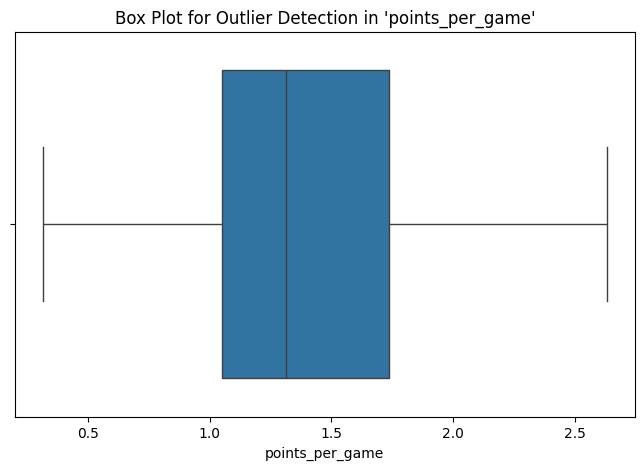

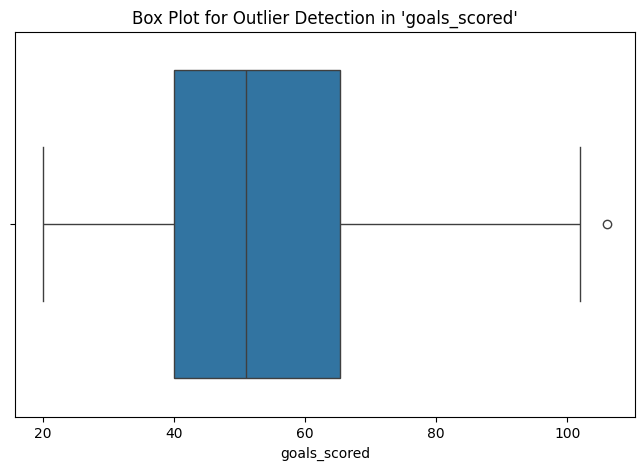

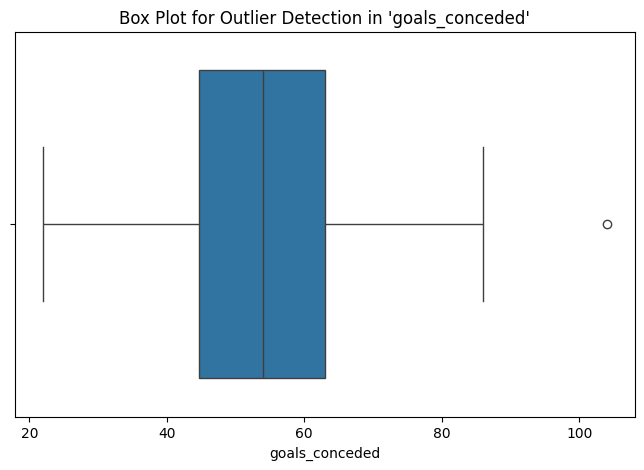

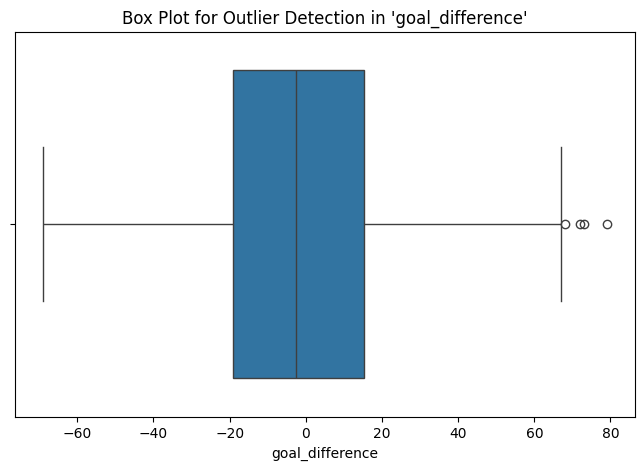

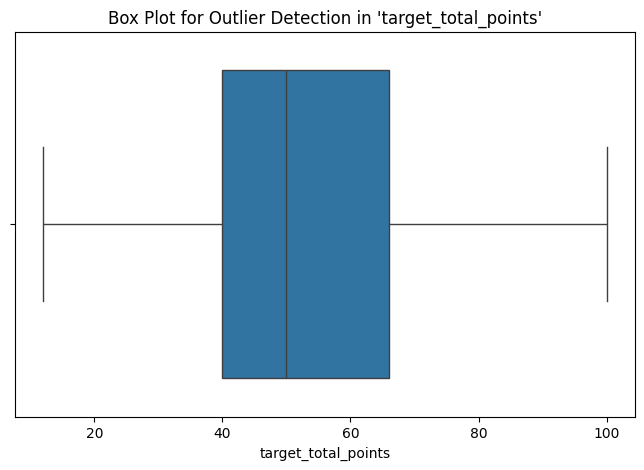

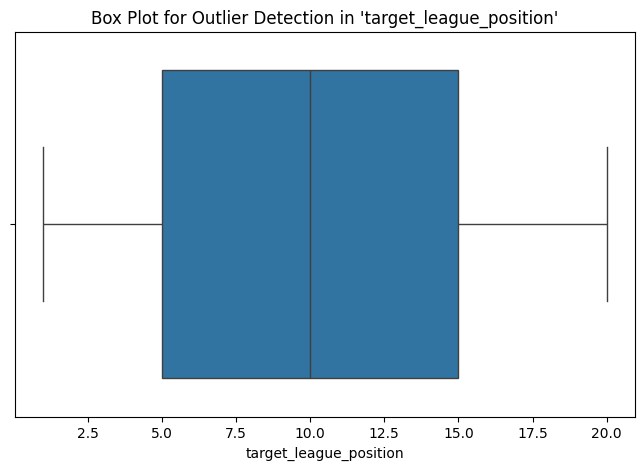

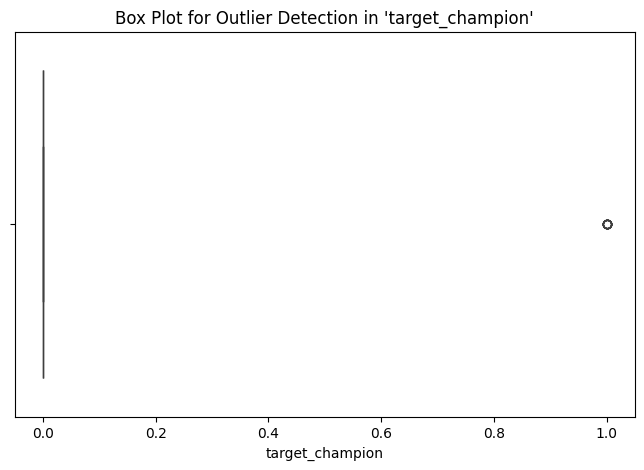

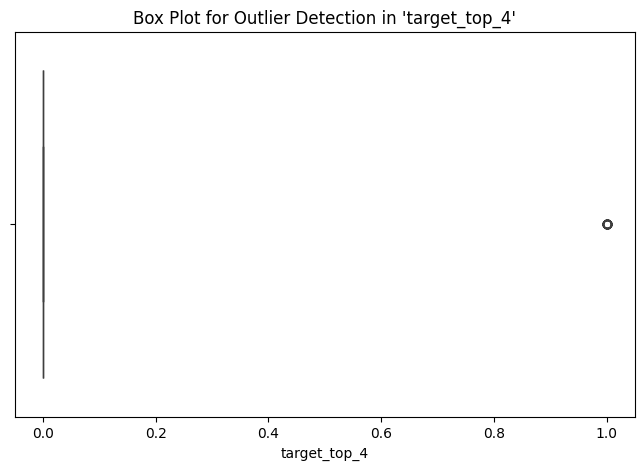

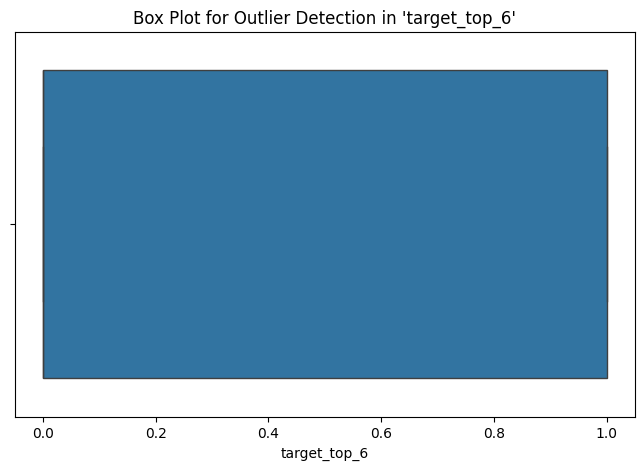

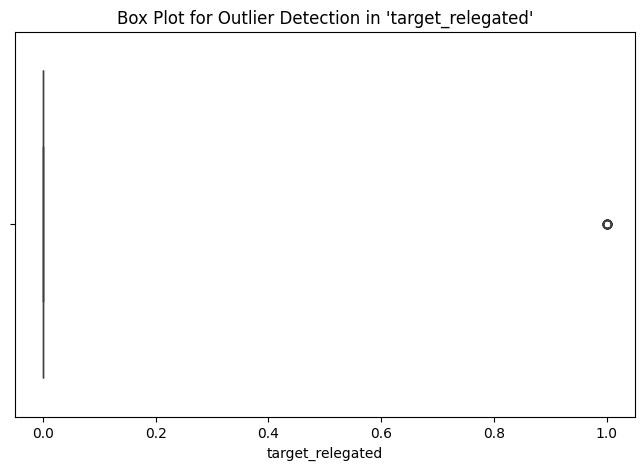

In [9]:
# Checking for outliers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numerical_cols = league_winner.select_dtypes(include=['number']).columns.tolist()

print(f"Generating box plots for columns: {numerical_cols}")

for column in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=league_winner[column])
    plt.title(f"Box Plot for Outlier Detection in '{column}'")
    plt.xlabel(column)
    plt.show()

In [17]:
X_reg = league_winner_selected.drop(['target_total_points', 'target_champion'], axis=1)
y_reg = league_winner_selected['target_total_points']

print(f"X_reg shape: {X_reg.shape}")
print(f"y_reg shape: {y_reg.shape}")
print("X_reg head:")
print(X_reg.head())
print("y_reg head:")
print(y_reg.head())

X_reg shape: (180, 6)
y_reg shape: (180,)
X_reg head:
   matches_played  wins  draws  losses  goals_scored  goals_conceded
0              38    11      9      18          45.0            67.0
1              38     9      7      22          39.0            67.0
2              38    19      9      10          49.0            35.0
3              38    12     14      12          59.0            53.0
4              38    11     14      13          59.0            55.0
y_reg head:
0    42
1    34
2    66
3    50
4    47
Name: target_total_points, dtype: int64


**Reasoning**:
Now that `X_reg` and `y_reg` are correctly defined, I will split these datasets into training and testing sets to prepare them for the regression model training. This will ensure that the model is evaluated on unseen data, preventing overfitting.

In [18]:
from sklearn.model_selection import train_test_split

X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

print(f"X_reg_train shape: {X_reg_train.shape}")
print(f"X_reg_test shape: {X_reg_test.shape}")
print(f"y_reg_train shape: {y_reg_train.shape}")
print(f"y_reg_test shape: {y_reg_test.shape}")

X_reg_train shape: (144, 6)
X_reg_test shape: (36, 6)
y_reg_train shape: (144,)
y_reg_test shape: (36,)


**Reasoning**:
Now that the data is prepared and split into training and testing sets for the regression task, I will initialize and train a RandomForestRegressor model. This model is suitable for predicting continuous values like 'target_total_points'.

In [19]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the RandomForestRegressor model
reg_model = RandomForestRegressor(n_estimators=100, random_state=42)
reg_model.fit(X_reg_train, y_reg_train)

print("Regression model training complete!")

Regression model training complete!


In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set for the regression model
y_reg_pred = reg_model.predict(X_reg_test)

# Evaluate the regression model
mae = mean_absolute_error(y_reg_test, y_reg_pred)
mse = mean_squared_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse) # Calculating RMSE from MSE
r2 = r2_score(y_reg_test, y_reg_pred)

print(f"Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Regression Model Evaluation:
Mean Absolute Error (MAE): 1.0656
Mean Squared Error (MSE): 3.0605
Root Mean Squared Error (RMSE): 1.7494
R-squared (R2): 0.9910


**Reasoning**:
Now that `X_reg` and `y_reg` are correctly defined, I will split these datasets into training and testing sets to prepare them for the regression model training. This will ensure that the model is evaluated on unseen data, preventing overfitting.



In [13]:
X_reg = league_winner_selected.drop(['target_total_points', 'target_champion'], axis=1)
y_reg = league_winner_selected['target_total_points']

print(f"X_reg shape: {X_reg.shape}")
print(f"y_reg shape: {y_reg.shape}")
print("X_reg head:")
print(X_reg.head())
print("y_reg head:")
print(y_reg.head())

X_reg shape: (180, 6)
y_reg shape: (180,)
X_reg head:
   matches_played  wins  draws  losses  goals_scored  goals_conceded
0              38    11      9      18          45.0            67.0
1              38     9      7      22          39.0            67.0
2              38    19      9      10          49.0            35.0
3              38    12     14      12          59.0            53.0
4              38    11     14      13          59.0            55.0
y_reg head:
0    42
1    34
2    66
3    50
4    47
Name: target_total_points, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Define features (X) and target (y)
X = league_winner_selected.drop('target_champion', axis=1)
y = league_winner_selected['target_champion']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (144, 7)
X_test shape: (36, 7)
y_train shape: (144,)
y_test shape: (36,)


Now, let's train a RandomForestClassifier model on the training data.

In [15]:
# Initialize and train the RandomForestClassifier model
model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


After training, it's crucial to evaluate the model's performance on the unseen test data. We'll look at accuracy, a classification report (precision, recall, f1-score), and a confusion matrix.

In [16]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00         2

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36


Confusion Matrix:
[[34  0]
 [ 0  2]]
